<a href="https://colab.research.google.com/github/medeirosgian/Data-Science/blob/main/An%C3%A1lise_dos_acidentes_PRF2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos dados de acidentes - PRF 2017**
Existente desde 1928, a Polícia Rodoviária Federal (PRF) é o orgão responsável pelo policiamento ostensivo das rodovias federais brasileiras, podendo requisitar apoio das instituições públicas necessárias para o serviço.

Assim como diversos órgãos públicos, a PRF divulga todo ano os dados referentes as suas atuações, neste caso, analisaremos os dados de acidentes em rodovias federais referentes ao ano de 2017.

<img alt="Policia Rodoviaria Federal" width="50%" align="middle" src="http://nova89.com.br/wp-content/uploads/2018/11/policia-rodoviaria-federal.jpg">

Os dados utilizados podem ser encontrados no [site do Kaggle](https://www.kaggle.com/marcuscosta/an-lise-base-acidentes-prf-ano-2017), o arquivo antes de ser analisado passou por uma correção devido a incompatibilidade de encodificação com o qual foi feito, arrumando somente os erros de digitação, nada que altere a análise.

**Nesta análise iremos utilizar os dados referente a todo território brasileiro, tentando responder algumas questões utilizando o apoio dos dados**

# Obtenção dos Dados

Todos os dados utilizados nesta análise podem ser obtidos pelo site do [Kaggle](https://www.kaggle.com/marcuscosta/an-lise-base-acidentes-prf-ano-2017).

Para a análise será utilizado um único arquivo disponível no site:
- datatran2017.csv

In [ ]:
# Import das bibliotecas necessárias para a visualização dos dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import do arquivo datatran2017.csv para um DataFrame

df = pd.read_csv('/content/datatran2017.csv', encoding='utf8', sep= ';')

# Análise Inicial

Essa etapa tem por objetivo criar uma consciência sobre os dados disponíveis no DataFrame, para isso vamos descrever melhor cada entrada:

**Dicionário das Variáveis**

- data_inversa = Data da ocorrência (inversa).
- uf = Unidade Federativa da ocorrência.
- br = Número de identificação da rodovia em que aconteceu o acidente.
- municipio = Município onde ocorreu o acidente
- causa_acidente = O que ocasionou o acidente
- tipo_acidente = Qual o tipo do acidente
- classificacao_acidente = Se houve vítimas ou não no acidente
- fase_dia = Em que fase do dia o acidente ocorreu
- sentido_via = Se a via era crescente ou decrescente
- condicao_meteorologica = Qual o clima no momento do acidente
- tipo_pista = Qual tipo de pista o acidente ocorreu (duplicada, normal)
- tracado_via = Qual o traçado da via no local do acidente
- latitude e longitude = Localidade do acidente
- pessoas, mortos, feridos, ilesos, ignorados e veículos = Envolvidos no acidente

As colunas *id*, *dia_semana*, *km* e *uso_solo* foram removidas por não impactarem na análise.

Antes de continuar a análise, vamos dar uma olhada em como os dados se parecem, visualizando as 5 primeiras entradas.


In [ ]:
# Verificar as 5 primeiras entradas do DataFrame

df.head()

,data_inversa,dia_semana,horario,uf,br,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,latitude,longitude,pessoas,mortos,feridos_leves,feridos_graves,feridos,ilesos,ignorados,veiculos
0,01/01/2017,domingo,00:00:00,PR,376.0,PARANAVAI ...,Fenomenos da Natureza ...,Queda de Ocupante de Veiculo ...,Com Vitimas Feridas,Plena Noite,Crescente,Chuva,Simples,Reta,-2309880731,-5238789369,1,0,0,1,1,0,1,1
1,01/01/2017,domingo,00:01:00,SC,101.0,PALHOCA ...,Falta de Atencao do Condutor ...,Colisao com objeto estatico ...,Sem Vitimas,Plena Noite,Crescente,Chuva,Dupla,Curva,-278101,-486357,1,0,0,0,0,1,1,1
2,01/01/2017,domingo,00:00:00,PR,153.0,SANTO ANTONIO DA PLATINA ...,Animais na Pista ...,Capotamento ...,Com Vitimas Feridas,Plena Noite,Decrescente,Garoa/Chuvisco,Simples,Reta,-2336951985,30993513107,2,0,2,0,2,0,1,1
3,01/01/2017,domingo,00:00:00,GO,153.0,ANAPOLIS ...,Avaria no Pneu ...,Tombamento ...,Com Vitimas Feridas,Plena Noite,Decrescente,Ceu Claro,Dupla,Reta,-1627473677,-4896908998,1,0,0,1,1,0,1,1
4,01/01/2017,domingo,00:00:00,SC,280.0,CORUPA ...,Ingestao de Alcool ...,Saida de leito carrocavel ...,Com Vitimas Feridas,Plena Noite,Decrescente,Chuva,Simples,Nao Informado,-2644675249,-4920166969,1,0,1,0,1,0,1,1


# **Q1. Qualidade dos dados disponíveis**

Antes de qualquer análise, é necessário verificar a qualidade dos dados disponíveis, verificar a ausência de variáveis e a distribuição dos dados.

Primeiro vamos verificar o número de variáveis e a quantidade de entradas.

In [ ]:
# Verificar o volume de dados presentes no DataFrame

print('Variáveis: \t{}\n Entradas: \t{}\n'.format(df.shape[1], df.shape[0]))

# Verificar tipos de dados
display(df.dtypes)

Variáveis: 	24
 Entradas: 	52250



data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
latitude                    int64
longitude                   int64
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
feridos                     int64
ilesos                      int64
ignorados                   int64
veiculos                    int64
dtype: object

Agora que temos a noção da quantidade de variáveis e entradas, vamos dar uma olhada em como esses dados estão dispostos.

In [ ]:
# Descrição dos dados presentes no DataFrame

df.describe()

,br,latitude,longitude,pessoas,mortos,feridos_leves,feridos_graves,feridos,ilesos,ignorados,veiculos
count,52169.000000,5.225000e+04,5.225000e+04,52250.000000,52250.000000,52250.000000,52250.000000,52250.000000,52250.000000,52250.0,52250.000000
mean,215.209492,-1.192539e+09,-2.883876e+09,2.299656,0.070048,0.732134,0.202105,0.934239,1.177895,1.0,1.627100
std,129.931553,1.186734e+09,2.629381e+09,1.823256,0.338862,1.085953,0.556339,1.248399,1.409805,0.0,0.751814
min,10.000000,-2.994231e+10,-7.734477e+10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,101.000000,-2.272134e+09,-4.880924e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
50%,163.000000,-9.512791e+08,-4.039279e+09,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,2.000000
75%,343.000000,-8.498636e+06,-3.841389e+07,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0,2.000000
max,495.000000,1.822381e+09,3.137211e+10,75.000000,21.000000,41.000000,21.000000,62.000000,64.000000,1.0,15.000000


Só com essa análise superficial, já podemos observar alguns pontos:
- Há um acidente com 21 mortos, o que não é ocasional e foge muito a normalidade dos acidentes. Este acidente provavelmente se refere ao acontecido no Espírito Santo, ele pode ser conferido [nesta matéria](https://g1.globo.com/espirito-santo/noticia/acidente-com-quatro-veiculos-deixa-mortos-e-feridos-na-br-101-em-guarapari.ghtml), porém não há confirmação dessa relação.

- Em mais de 75% dos casos, não houve mortes associadas.

(array([4.9248e+04, 2.5920e+03, 2.9100e+02, 6.1000e+01, 3.2000e+01,
        1.1000e+01, 7.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21.]),
 <a list of 21 Patch objects>)

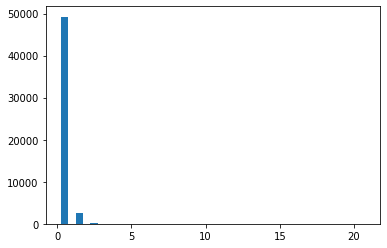

In [ ]:
# Plot gráfico de mortos

plt.hist(df.mortos, 21, rwidth=0.5)

- Em mais de 75% dos casos não há mais que 1 ferido.

(array([2.0036e+04, 2.2420e+04, 6.5810e+03, 1.7510e+03, 7.6600e+02,
        3.4400e+02, 1.4400e+02, 6.6000e+01, 4.2000e+01, 2.0000e+01,
        1.1000e+01, 1.2000e+01, 7.0000e+00, 7.0000e+00, 6.0000e+00,
        9.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
    

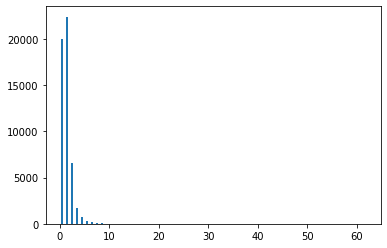

In [ ]:
# Plot gráfico de feridos

plt.hist(df.feridos, 62, rwidth=0.5)

Vamos observar também se há ausência de dados:

In [ ]:
# Verificar a ausência de dados no DataFrame

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

br                        0.00155
km                        0.00155
veiculos                  0.00000
sentido_via               0.00000
data_inversa              0.00000
dia_semana                0.00000
horario                   0.00000
uf                        0.00000
municipio                 0.00000
causa_acidente            0.00000
tipo_acidente             0.00000
classificacao_acidente    0.00000
fase_dia                  0.00000
condicao_metereologica    0.00000
ignorados                 0.00000
tipo_pista                0.00000
tracado_via               0.00000
uso_solo                  0.00000
latitude                  0.00000
longitude                 0.00000
pessoas                   0.00000
mortos                    0.00000
feridos_leves             0.00000
feridos_graves            0.00000
feridos                   0.00000
ilesos                    0.00000
id                        0.00000
dtype: float64

Como há menos de 1% de ausência de dados, podemos ignorar a falta desses dados visto que eles não irão impactar a análise.

# **Q2. Gráfico de acidentes nas rodovias brasileiras**

No nosso DataFrame, há a presença da latitude e longitude 

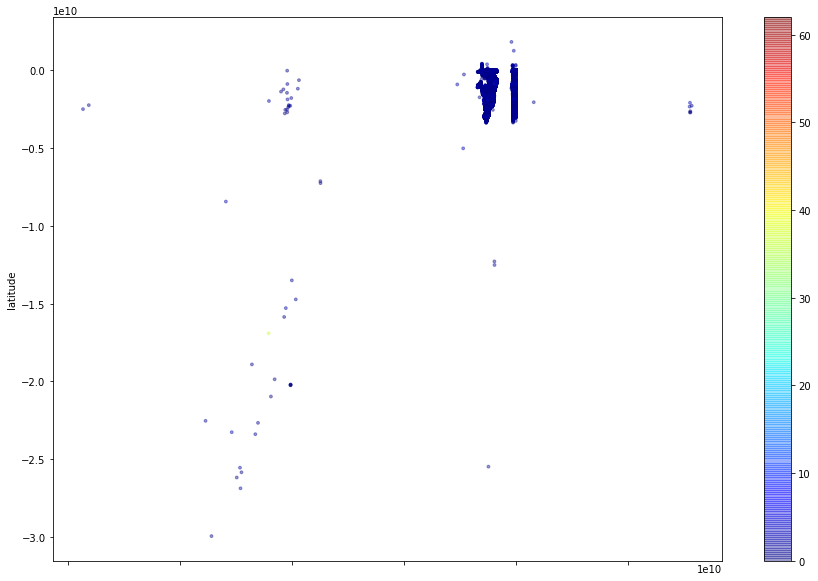

In [ ]:
df.plot(kind = 'scatter', x='longitude', y='latitude', cmap=plt.get_cmap('jet'), s = 8, alpha = 0.4, figsize = (15, 10), c =df['feridos'])

# **Q3. Em quais rodovias acontecem o maior número de acidentes?**

Para descobrir as rodovias com maior número de acidentes, simplesmente precisamos contar a ocorrência de uma mesma rodovia nos dados.

In [ ]:
df.br.value_counts()

101.0    8048
116.0    7736
381.0    2840
40.0     2409
153.0    2198
         ... 
473.0       1
433.0       1
482.0       1
434.0       1
403.0       1
Name: br, Length: 113, dtype: int64

Podemos ver que a BR-101 que corta o litoral brasileiro lidera o número de acidentes em rodovias federais, seguida pela BR-116 que também cerca o litoral brasileiro. Essas duas rodovias lideram o ranking de acidentes com certa vantagem, com isso já podemos observar que **o litoral brasileiro é o local com maior incidência de acidentes**.

A BR-381 liga o norte do Espírito Santo a Belo Horizonte, sendo a primeira que não corta o litoral.

Tendo conhecimento de que as rodovias do litoral presenciam maior número de acidentes, iremos análisar mais duas questões:

- O que ocasiona esses acidentes?
- Quais os tipos de acidentes mais comuns?

# **Q4. O que ocasiona esses acidentes?**

Como nossos dados nos entregam a causa dos acidentes junto ao seu registo, iremos verificar as causas de acidentes mais comuns nas rodovias que presenciam mais acidentes no Brasil.

In [ ]:
# Contagem das causas de acidentes nas BR's 101 e 116

df_clean = df.loc[(df.br == 101.0) | (df.br == 116.0)]

df_clean.causa_acidente.value_counts()


Falta de Atencao do Condutor                                                                                          6242
Velocidade Incompativel                                                                                               1693
Não Guardar Distancia de Seguranca                                                                                    1320
Ingestao de Alcool                                                                                                    1011
Desobediencia a Sinalizacao                                                                                            888
Defeito Mecanico no Veiculo                                                                                            831
Pista Escorregadia                                                                                                     780
Condutor Dormindo                                                                                                      619
Falta de Atencao

Como visto a cima, a falta de atenção do condutor é a maior causa de acidentes nas rodovias federais, seguida por velocidade incopatível e por não guardar a distância segura do veículo a frente. Logo, podemos afirmar que as 3 maiores causas de acidente são por erro humano.

Podemos observar também que infrações de transito e problemas mecânicos também são causadores de acidentes. O acaso também pode ser observado em casos de mal subito e fenomenos da natureza.

# **Q5. Quais os acidentes mais comuns?**

Agora que descobrimos as maiores causas de acidentes, vamos observar também como esses acidentes acontecem, ou seja, o que de fato acontece no momento do acidente.

In [ ]:
# Contagem dos tipos de acidentes nas BR's 101 e 116

df_clean.tipo_acidente.value_counts()

Colisao Traseira                                                                                                                                                                                            3207
Saida de leito carrocavel                                                                                                                                                                                   2115
Colisao Lateral                                                                                                                                                                                             2095
Colisao com objeto estatico                                                                                                                                                                                 1797
Colisao Transversal                                                                                                                                                 

Podemos observar que a colisão traseira é o acidente mais comum, seguido pela saída de leito carroçável, apesar do nome estranho, o leito carroçável é a área em que a circulação de alguma coisa, seja ela de carros, motos, bicicletas ou pessoas. A colisão lateral, com objeto estático e transversal apoia a suposição que a colisão direta representa a maior parte dos acidentes.

Devemos ressaltar aqui também os acidentes em que há a queda de algum ocupante do veículo e o derramamento de carga.